# Notebook for creating max hail size distribution histograms

### Import necessary libraries

In [40]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import matplotlib.mlab as mlab

### Import WRF HIST, mid- and end-FUTR RCP 4.5, 8.5 files (resampled to daily maz 12Z-12Z)

In [2]:
hist = xr.open_dataset('/home/scratch/jgoodin/hist_daily_max_hail_inches.nc') #Open hist daily max .nc file saved to /home/scratch directory
mid4p5 = xr.open_dataset('/home/scratch/jgoodin/mid_century_4p5_daily_max_hail_inches.nc') #Open mid-FUTR 4.5 daily max .nc file saved to /home/scratch directory
mid8p5 = xr.open_dataset('/home/scratch/jgoodin/mid_century_8p5_daily_max_hail_inches.nc') #Open mid-FUTR 8.5 daily max .nc file saved to /home/scratch directory
end4p5 = xr.open_dataset('/home/scratch/jgoodin/end_century_4p5_daily_max_hail_inches.nc') #Open end-FUTR 4.5 daily max .nc file saved to /home/scratch directory
end8p5 = xr.open_dataset('/home/scratch/jgoodin/end_century_8p5_daily_max_hail_inches.nc') #Open end-FUTR 8.5 daily max .nc file saved to /home/scratch directory

In [11]:
mid4p5

<xarray.DataArray 'HAIL_MAX2D' (Time: 5478, south_north: 899, west_east: 1399)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.25281045,
         0.26125824, 0.26214084],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * Time     (Time) datetime64[ns] 2040-09-30T12:00:00 ... 2055-09-29T12:00:00
Dimensions without coordinates: south_north, west_east

### Convert each file to units of in (provided by dataset in m)

In [3]:
hist = hist.HAIL_MAX2D * 39.3701 #Convert to in
mid4p5 = mid4p5.HAIL_MAX2D * 39.3701 #Convert to in
mid8p5 = mid8p5.HAIL_MAX2D * 39.3701 #Convert to in
end4p5 = end4p5.HAIL_MAX2D * 39.3701 #Convert to in
end8p5 = end8p5.HAIL_MAX2D * 39.3701 #Convert to in

In [12]:
hist

<xarray.DataArray 'HAIL_MAX2D' (Time: 5479, south_north: 899, west_east: 1399)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * Time     (Time) datetime64[ns] 1990-09-30T12:00:00 ... 2005-09-29T12:00:00
Dimensions without coordinates: south_north, west_east

## Take max values from each file

In [14]:
hist_max = hist.max(dim = 'Time')
mid4p5_max = mid4p5.max(dim = 'Time')
mid8p5_max = mid8p5.max(dim = 'Time') # Take .max for each file to find maximum daily value for each simulation period
end4p5_max = end4p5.max(dim = 'Time')
end8p5_max = end8p5.max(dim = 'Time')

In [15]:
hist_max #Test print one dataset- data must be 2D to create histogram

<xarray.DataArray 'HAIL_MAX2D' (south_north: 899, west_east: 1399)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.2715418 , 0.25278768,
        0.25367117],
       ...,
       [0.4861312 , 0.48748022, 0.506445  , ..., 1.0287015 , 1.0620818 ,
        1.063256  ],
       [0.4595274 , 0.4600721 , 0.4455388 , ..., 1.016743  , 1.0463109 ,
        1.0410988 ],
       [0.45953378, 0.45956013, 0.44940734, ..., 1.0176986 , 1.0193948 ,
        1.019366  ]], dtype=float32)
Dimensions without coordinates: south_north, west_east

## Create a histogram of max HAIL_MAX2D values- how many times is each hail size bin occurring?

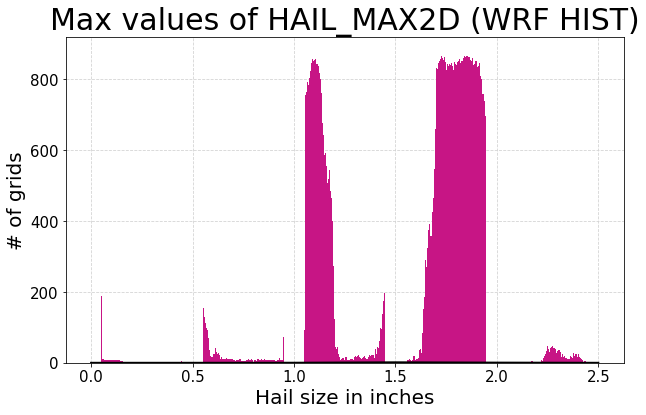

In [50]:
#num_bins = 50
#n, bins, patches = ax.hist(hist_max, num_bins, density=1)
fig, ax = plt.subplots(figsize =(10, 6))
n, bins, patches = plt.hist(hist_max, bins = [0, 0.5, 1, 1.5, 2, 2.5], facecolor='mediumvioletred', zorder = 10)
(mu, sigma) = norm.fit(hist_max)
best_fit_line = norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line, 'k-', linewidth = 2, zorder = 20, color = 'k')
plt.grid(color = 'lightgrey', linestyle = '--')
ax.set_title('Max values of HAIL_MAX2D (WRF HIST)', fontsize = 30)
ax.set_xlabel('Hail size in inches', fontsize = 20)
ax.set_ylabel('# of grids', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()